# Table of Contents

#### 1. Introduction

#### 2. Dataset and Exploratory Data Analysi

#### 3. Methodology

#### 4. Results

#### 5. Model Diagnostics

#### 6.  Limitations and Future Investigation

#### 7.  Conclusion

## 1. Introduction 



## 2. Dataset and Exploratory Data Analysis

### 2.1 Data

We imported the PGA Tour Data from Kaggle (https://www.kaggle.com/jmpark746/pga-tour-data-2010-2018). The statistics of the 1,678 PGA players from 2010 to 2018 are provided in the dataset, inlcuding the number of rounds, fairway hit percentage, average driving distance, green in regulation, average putts per round, average scrambling percentage, average 18 holes score, and the total money the player made in the specific year. 

In [39]:
# Importign packages
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [40]:
# Importing Data
pga_tour_stats = pd.read_csv('pgaTourData.csv')  

In [42]:
#Drop NaNs
pga_tour_stats = pga_tour_stats.dropna(subset=['Avg Distance', 'Year','gir', 'Average Putts' ])
pga_tour_stats.dtypes

# Dropping the "$" in column 'Money' and convert the column's type to float
# reference: https://pbpython.com/currency-cleanup.html
def money_to_float(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

pga_tour_stats['Money'] = pga_tour_stats['Money'].apply(money_to_float).astype('float')

pga_tour_stats.head(5)

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0


### 2.2 Exploratory Data Analysis

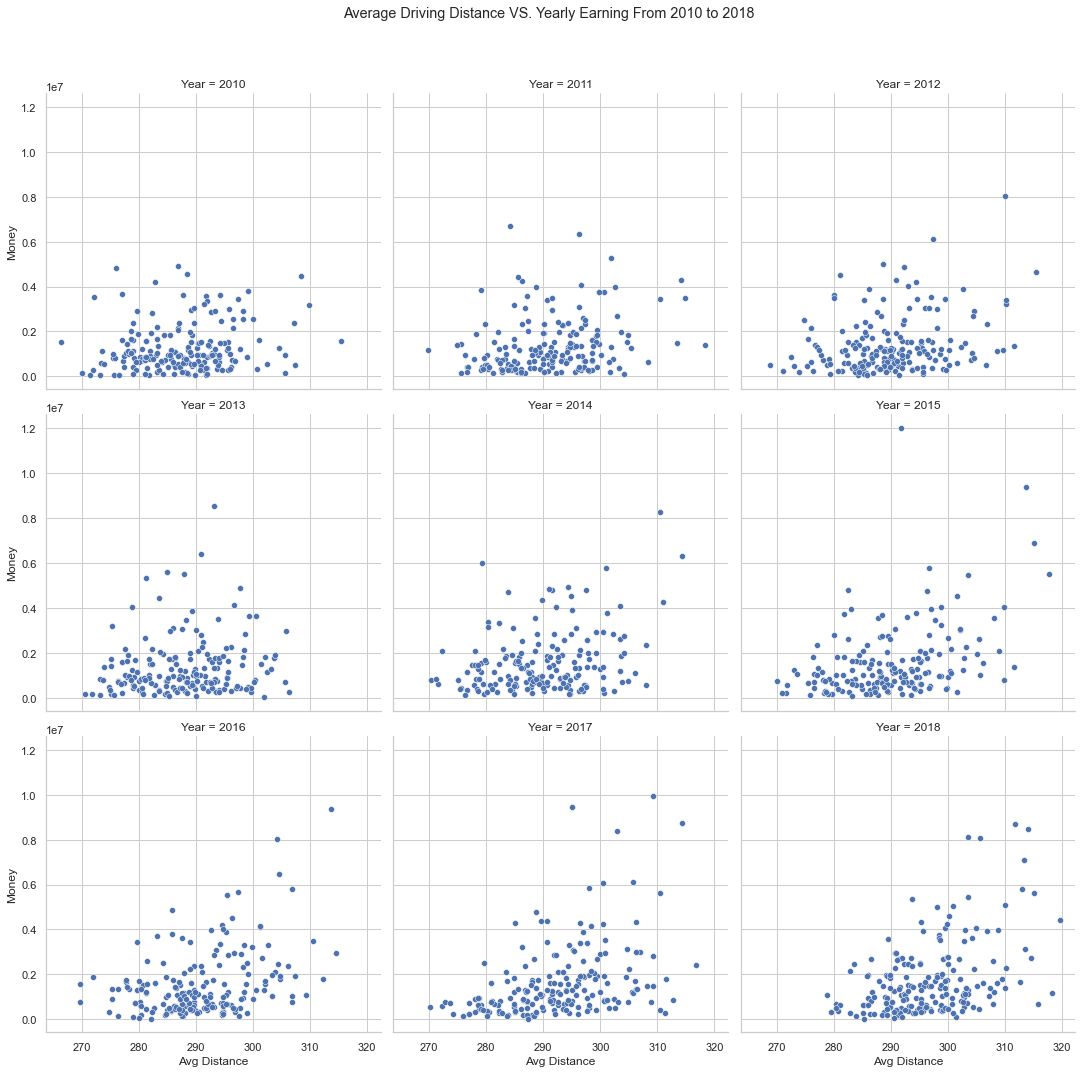

In [48]:
fig_1 = sns.relplot(data=pga_tour_stats, x="Avg Distance", y="Money", height=5, col="Year", col_wrap=3)
fig_1.fig.subplots_adjust(top=0.9) 
fig_1.fig.suptitle('Average Driving Distance VS. Yearly Earning From 2010 to 2018')
fig_1

The plots above display the relationship between average driving distance and yearly earning from 2010 to 2018.  It appears that the two variables have a weak positive relationship from 2011 onward. As the average driving distance
increases, the yearly earning also increases. 

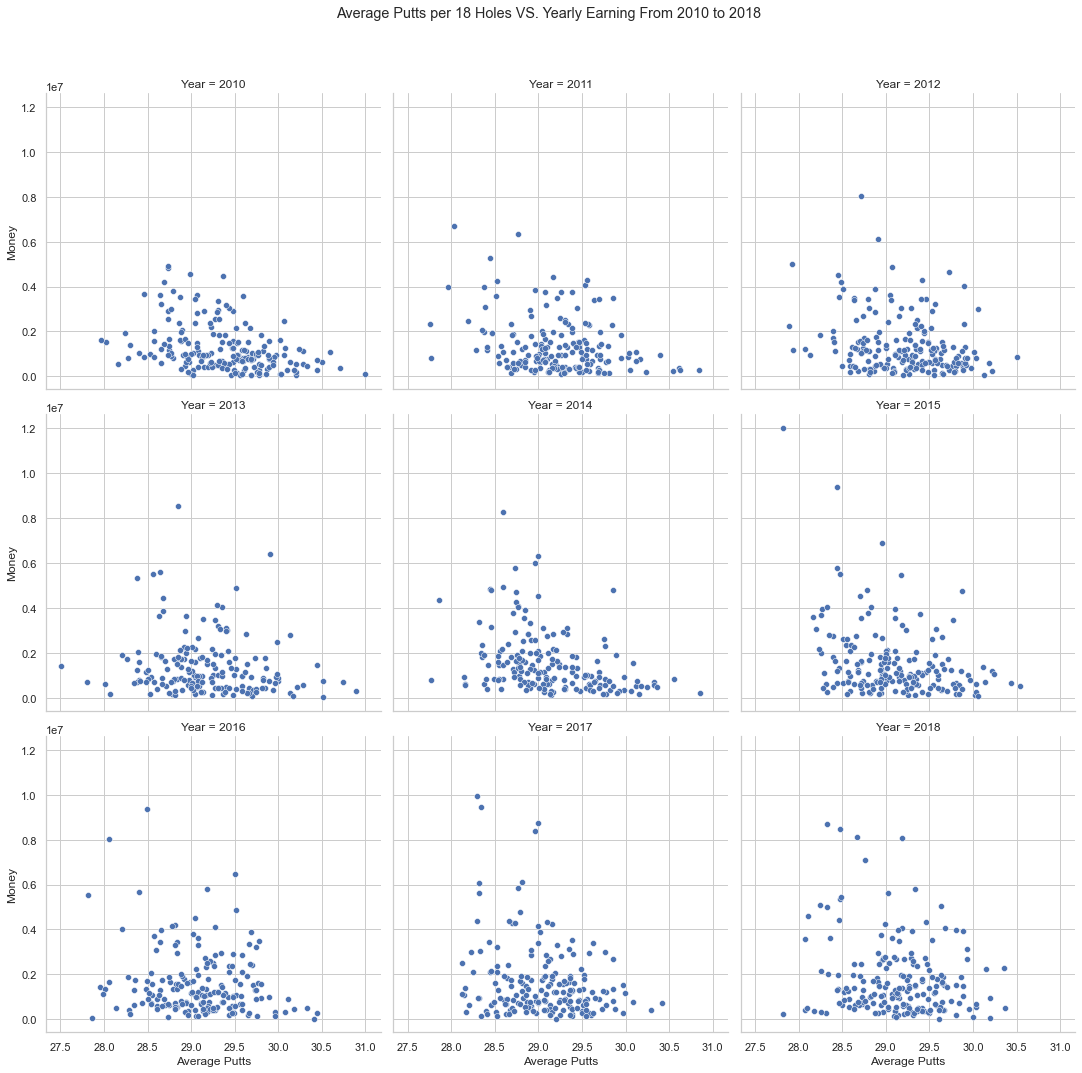

In [50]:
fig_2 = sns.relplot(data=pga_tour_stats, x="Average Putts", y="Money", height=5, col="Year", col_wrap=3)
fig_2.fig.subplots_adjust(top=0.9) 
fig_2.fig.suptitle('Average Putts per 18 Holes VS. Yearly Earning From 2010 to 2018')
fig_2

The plot above displays the relationship between average putts per 18 holes and  yearly earning from 2010 to 2018. It appears the the two variables have a negative relationship for all years. As the average putts
increases, the yearly earning decreases. 

## 3. Methodology

## 4. Results

## 5. Model Diagnostics         

## 6. Limitations and Future Investigation

## 7. Limitations and Future Investigation